**Load the dataset and print the complete information of the dataset and name the columns that has missing values.**

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

In [3]:
print(df.info())
c=df.columns[df.isnull().any()].tolist()
print("columns that has missing values are",",".join(c))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
columns that has missing values are director,cast,country,date_added,rating,duration


**Load the dataset and print the top 10 countries contributing to the Content on Netflix.**

In [4]:
t=df['country'].value_counts().head(10)
print (t)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


**list the 5 most popular types of genre on the platform.**

In [ ]:
g=df['listed_in'].str.split(", ").explode().value_counts().head(5)
print(g)

**categorize into TV shows and Movies and display 2 rows for each.**

In [5]:
t=df[df['type']=='TV Show'].head(2) # for tv show
m=df[df['type']=='Movie'].head(2) # for movie
print(m)
print(t)


  show_id   type                             title  \
0      s1  Movie              Dick Johnson Is Dead   
6      s7  Movie  My Little Pony: A New Generation   

                        director  \
0                Kirsten Johnson   
6  Robert Cullen, José Luis Ucha   

                                                cast        country  \
0                                                NaN  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...            NaN   

           date_added  release_year rating duration                 listed_in  \
0  September 25, 2021          2020  PG-13   90 min             Documentaries   
6  September 24, 2021          2021     PG   91 min  Children & Family Movies   

                                         description  
0  As her father nears the end of his life, filmm...  
6  Equestria's divided. But a bright-eyed hero be...  
  show_id     type          title         director  \
1      s2  TV Show  Blood & Water              NaN 

**find the Oldest movies .**

In [7]:
mo=df[df['type']=='Movie']
old=mo[mo['release_year']==mo['release_year'].min()]
print("Oldest movie is :\n", old['title'])

Oldest movie is :
 7790          Prelude to War
8205    The Battle of Midway
Name: title, dtype: object


**get the count of values for duration column.**

In [10]:
dc=df['duration'].value_counts()
print("Value counts for duration \n",dc)


Value counts for duration 
 duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64


**find the measures of central tendency and dispersion of duration column by extracting numerical part of the duration column.**

In [11]:
df['duration_num']=df['duration'].str.extract('(\d+)',expand=False).astype(float)
mean=df['duration_num'].mean()
h=df['duration_num'].max()
l=df['duration_num'].min()
d=df['duration_num'].std()
v=df['duration_num'].var()

print(f'The mean duration is {mean}')
print(f'The highest duration is {h}')
print(f'The minimum duration is {l}')
print(f'The variance of duration is {v}')
print(f'The standard deviation is {d}')

The mean duration is 69.84688777828259
The highest duration is 312.0
The minimum duration is 1.0
The variance of duration is 2582.146723244931
The standard deviation is 50.81482778918896


**find the measures of central tendency and dispersion of duration column by extracting numerical part of the duration column.**

In [12]:
mean=df['duration_num'].mean()
h=df['duration_num'].max()
l=df['duration_num'].min()
d=df['duration_num'].std()
v=df['duration_num'].var()

print(f'The mean duration is {mean}')
print(f'The highest duration is {h}')
print(f'The minimum duration is {l}')
print(f'The variance of duration is {v}')
print(f'The standard deviation is {d}')

The mean duration is 69.84688777828259
The highest duration is 312.0
The minimum duration is 1.0
The variance of duration is 2582.146723244931
The standard deviation is 50.81482778918896


**plot the histogram on Netflix Content Release Year Distribution.**

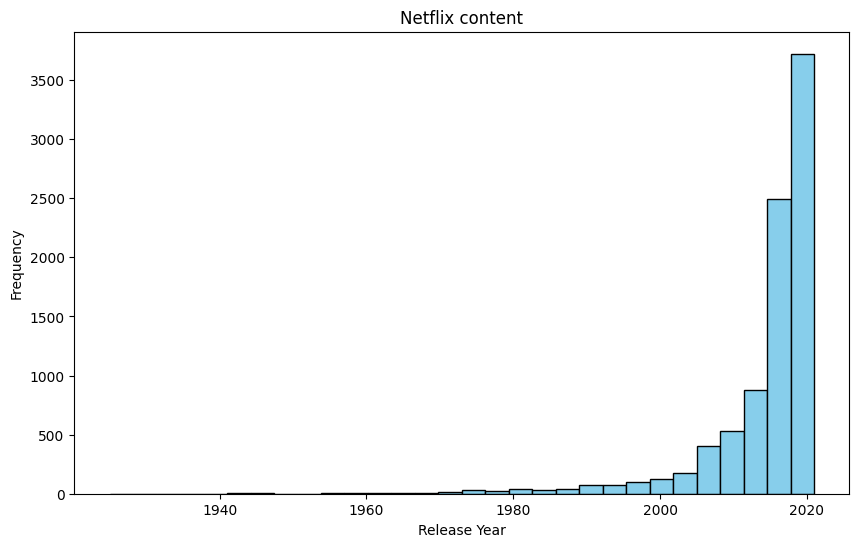

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df['release_year'],bins=30,color="skyblue",edgecolor="black")
plt.title('Netflix content')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

**plot the Distribution of Populartiy of different content categories using countplot.**

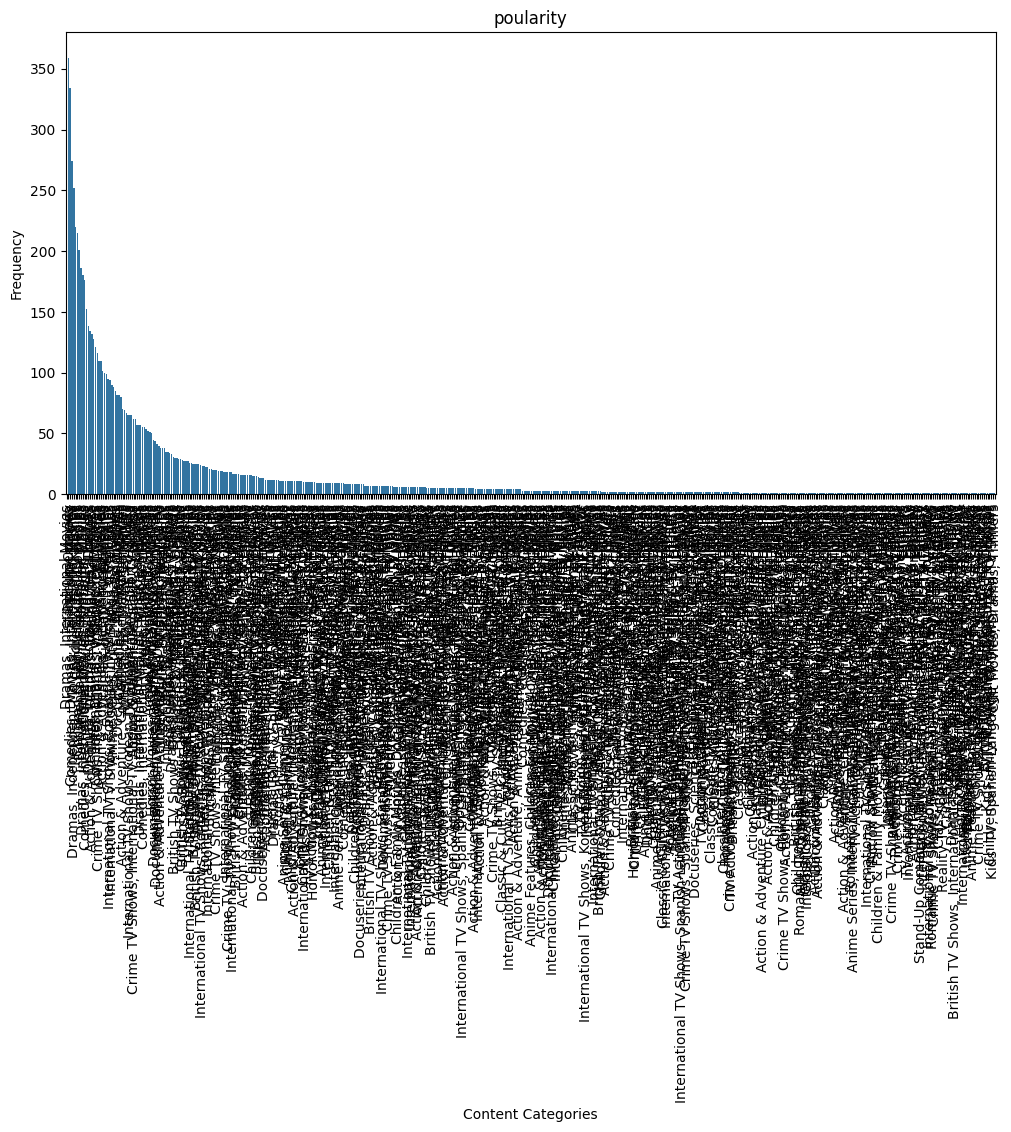

In [20]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot (data=df,x= "listed_in", order=df['listed_in'].value_counts().index)
plt.title('poularity')
plt.xlabel('Content Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()